<a href="https://colab.research.google.com/github/blazingbhavneek/scratch_ml/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import softmax

In [12]:
x, y = datasets.make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=2, n_clusters_per_class=1, n_classes=3, random_state=42)

encoder = OneHotEncoder(sparse_output=False, categories='auto')
y = encoder.fit_transform(y.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x.shape

(100, 5)

In [14]:
y.shape

(100, 3)

In [36]:
class LogisticRegression:
  def __init__(self, lr=0.001, epochs=10000):
    self.lr=lr
    self.epochs=epochs
    self.weights=None
    self.bias=None

  def fit(self, x, y):
    # print(x.shape)
    # print(y.shape)
    self.weights = np.random.rand(x.shape[1], y.shape[1])
    self.bias = np.random.rand(1, y.shape[1])

    y_hat = softmax(np.matmul(x, self.weights)+self.bias)
    diff = y_hat-y

    for e in range(self.epochs):
      dw=np.zeros((x.shape[1], y.shape[1]))
      db=np.zeros(self.bias.shape)
      for i in range(x.shape[0]):
        # print(x[i].shape)
        # print(diff[i].shape)
        dw+=np.outer(x[i], diff[i])
        db+=diff[i]
      dw/=x.shape[0]
      db/=x.shape[0]
      self.weights-=self.lr*dw
      self.bias-=self.lr*db

  def predict(self, x, y):
    acc=0
    cnt=0
    y_hat = softmax(np.matmul(x, self.weights)+self.bias)
    pred_class = np.argmax(y_hat, axis=1)
    true_class = np.argmax(y, axis=1)
    # print(pred_class)
    for i in range(x.shape[0]):
      cnt+=1
      if pred_class[i] == true_class[i]:
        acc+=1
    print("Accuracy: {:.2f}".format(acc/cnt*100))
    return y_hat

In [37]:
model = LogisticRegression()

In [38]:
model.fit(x_train, y_train)

In [39]:
y_hat = model.predict(x_test, y_test)

Accuracy: 55.00


In [40]:
y_hat_full = model.predict(x, y)

Accuracy: 74.00


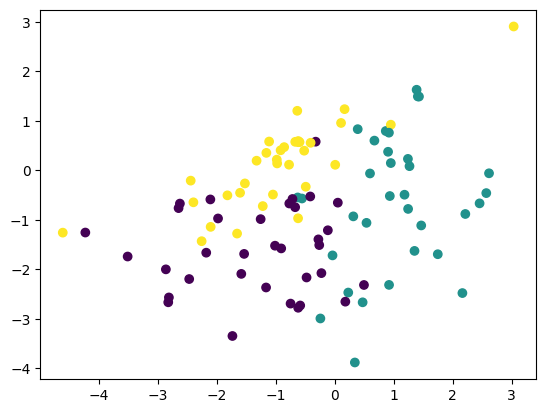

In [43]:
plt.figure()
plt.scatter(x[:, 2], x[:, 3], c=np.argmax(y, axis=1), cmap='viridis', marker='o', label='True Class')
plt.show()

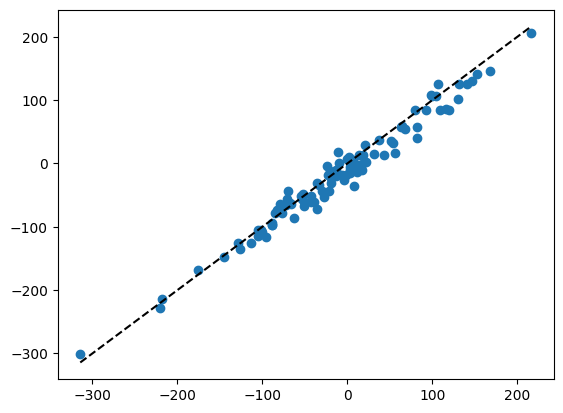

In [ ]:
y_plot = y[:, 1]
plt.figure()
plt.scatter(y_plot, y_hat_full[:, 1])
plt.plot([min(y_plot), max(y_plot)], [min(y_plot), max(y_plot)], linestyle='--', color='k', label='y=x')
plt.show()